In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('../data/positions_xyz_60px_full.csv')
dataCoordinates = pd.read_csv('../data/red_ball_coordinates_60px_full.csv')

# X zijn de 14 inputs, en y zijn de 3 outputs
y = dataPositions.values
X = dataCoordinates.values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9347, 14)
Shape of y: (9347, 3)


In [3]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
dfX = imputer.fit_transform(X)
dfy = imputer.fit_transform(y)

In [4]:
total_samples = len(dfX)
train_samples = int(0.8 * total_samples)
val_samples = int(0.1 * total_samples)

# Split the data
X_train = dfX[:train_samples]
y_train = dfy[:train_samples]

X_val = dfX[train_samples:train_samples+val_samples]
y_val = dfy[train_samples:train_samples+val_samples]

X_test = dfX[train_samples+val_samples:]
y_test = dfy[train_samples+val_samples:]

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

X_train_scaled.shape[0], X_val_scaled.shape[0], X_test_scaled.shape[0]

(7477, 934, 936)

In [5]:
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=28000, random_state=42)

model.fit(X_train_scaled, y_train_scaled)

MLPRegressor(max_iter=28000, random_state=42)

In [6]:
y_val_pred_scaled = model.predict(X_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

In [7]:
from utils.evaluate import evaluate_model

mse_val, mae_val, r2_val = evaluate_model(y_val, y_val_pred, "Validation")

Mean Squared Error on Validation Set: 0.039042639565722174
Mean Absolute Error on Validation Set: 0.1471339177012346
R2 Score on Validation set: -5.820248560128076e+26


In [8]:
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

In [9]:
mse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred, "Test")

Mean Squared Error on Test Set: 0.04774840714333071
Mean Absolute Error on Test Set: 0.15692967016080786
R2 Score on Test set: -1.946013363960949e+26


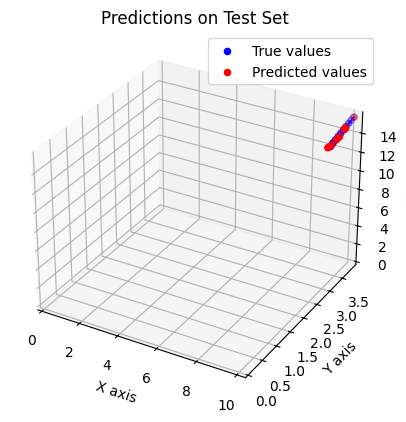

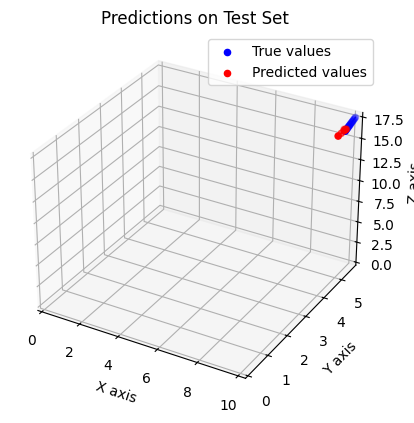

In [12]:
from utils.plot_maker import plot_maker_3d

plot_maker_3d(y_test, y_test_pred, "Predictions on Test Set")
plot_maker_3d(y_test[400:440], y_test_pred[400:440], "Predictions on Test Set")